In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [4]:
df = pd.read_csv("Breast_Cancer.csv")
#Tumor (T) : How large is the priamry tumor 
#Node (N) : Has the tumor spread to the lymph nodes
#Metastasis (M) : Has the cancer spread to other body parts
#Stage : Regional—Cancer has spread to nearby lymph nodes, tissues, or organs.
#                Distant—Cancer has spread to distant parts of the body.
#Differentiate : how much or how little tumor tissue looks like the normal tissue it came from
#Estrogen : Female hormone
#Progesterone : Female hormone secreted while pregnant
#Regional Node Examined : No of lymph nodes examined
#Reginol Node Postive : No of lymph nodes where cancer exists

In [5]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [6]:
df.count()

Age                       4024
Race                      4024
Marital Status            4024
T Stage                   4024
N Stage                   4024
6th Stage                 4024
differentiate             4024
Grade                     4024
A Stage                   4024
Tumor Size                4024
Estrogen Status           4024
Progesterone Status       4024
Regional Node Examined    4024
Reginol Node Positive     4024
Survival Months           4024
Status                    4024
dtype: int64

In [7]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [8]:
df.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [9]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [10]:
for col in df:
    res = df[col].dtypes
    if(res != "object"):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]


In [11]:
df.count()

Age                       3267
Race                      3267
Marital Status            3267
T Stage                   3267
N Stage                   3267
6th Stage                 3267
differentiate             3267
Grade                     3267
A Stage                   3267
Tumor Size                3267
Estrogen Status           3267
Progesterone Status       3267
Regional Node Examined    3267
Reginol Node Positive     3267
Survival Months           3267
Status                    3267
dtype: int64

In [12]:
df['Age'].unique()

array([68, 50, 58, 47, 51, 40, 46, 65, 48, 61, 56, 43, 60, 57, 55, 66, 53,
       59, 54, 49, 64, 62, 42, 69, 37, 67, 52, 31, 33, 63, 39, 38, 45, 36,
       41, 44, 32, 34, 35, 30])

<BarContainer object of 2 artists>

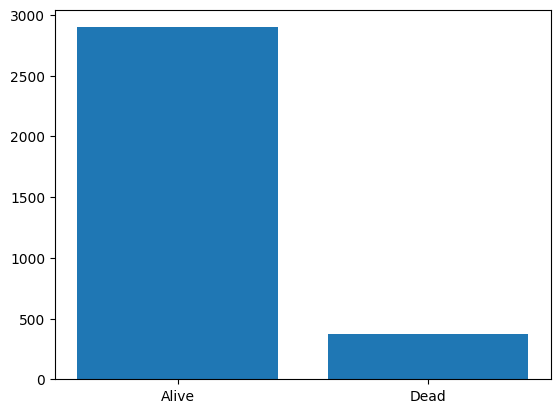

In [13]:
#Class values 
value_counts = df['Status'].value_counts()

plt.bar(value_counts.index, value_counts.values)
#conc : The data is imbalanced

/tmp/ipykernel_9552/3438313754.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(x=df["Tumor Size"],hist = False,kde_kws={'shade':True},color='red')
/home/mariam/.local/lib/python3.10/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: ylabel='Density'>

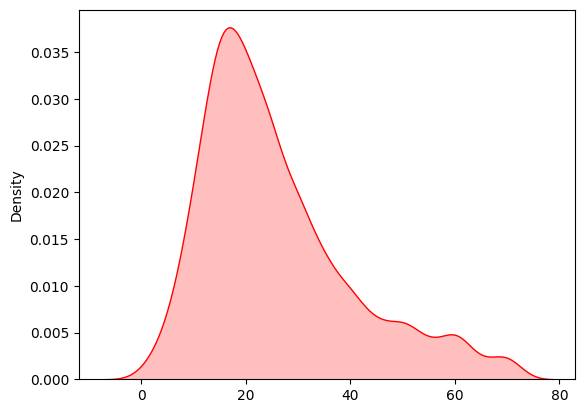

In [14]:
sb.distplot(x=df["Tumor Size"],hist = False,kde_kws={'shade':True},color='red')
#20 mm is the size most common tumor size

(array([ 34.,  72., 184., 302., 514., 463., 455., 431., 444., 368.]),
 array([30. , 33.9, 37.8, 41.7, 45.6, 49.5, 53.4, 57.3, 61.2, 65.1, 69. ]),
 <BarContainer object of 10 artists>)

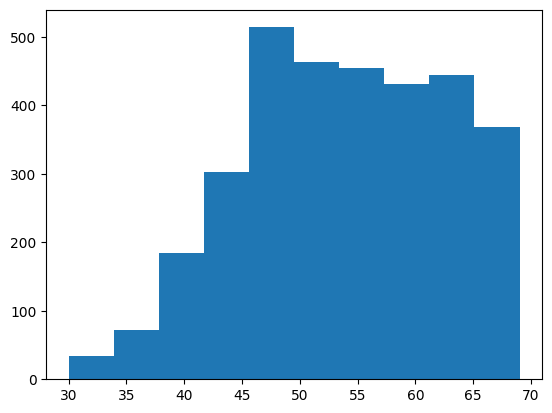

In [15]:
plt.hist(df['Age'],bins = 10)
#Women above 45 tend to have a higher risk of having Cancer 

<Axes: xlabel='Marital Status'>

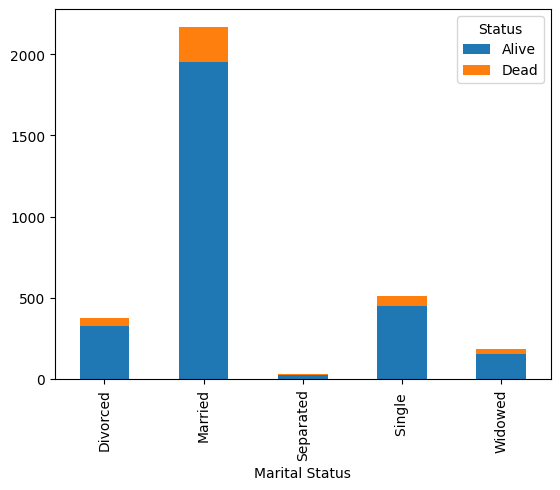

In [16]:
df.groupby(['Marital Status', 'Status']).size().unstack().plot(kind='bar', stacked=True)
#Married Women have the highest percentage of having cancer and also the highest percentage in dying

<Axes: xlabel='Age', ylabel='Survival Months'>

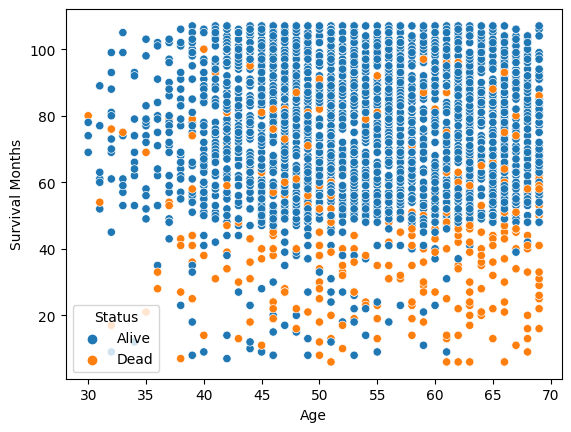

In [17]:
sb.scatterplot(data = df,x="Age",y="Survival Months",hue="Status")
#The older people have a lower chance to survive more months and live
#The people who survived more than 40 months have a higher chance of survival

<Axes: >

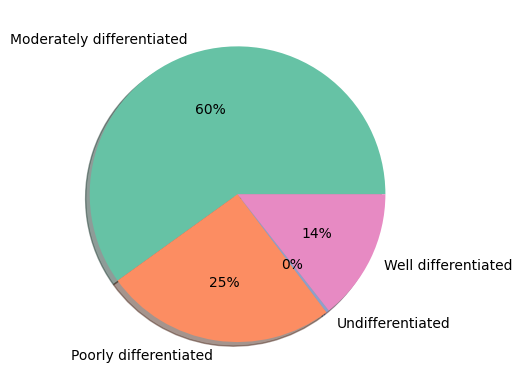

In [18]:
df.groupby(['differentiate']).size().plot(kind='pie',y='Race',autopct='%1.0f%%',shadow=True,colors=sb.color_palette('Set2'))
#The highest percentage of cancerous tissue are the one that are moderately differentiated

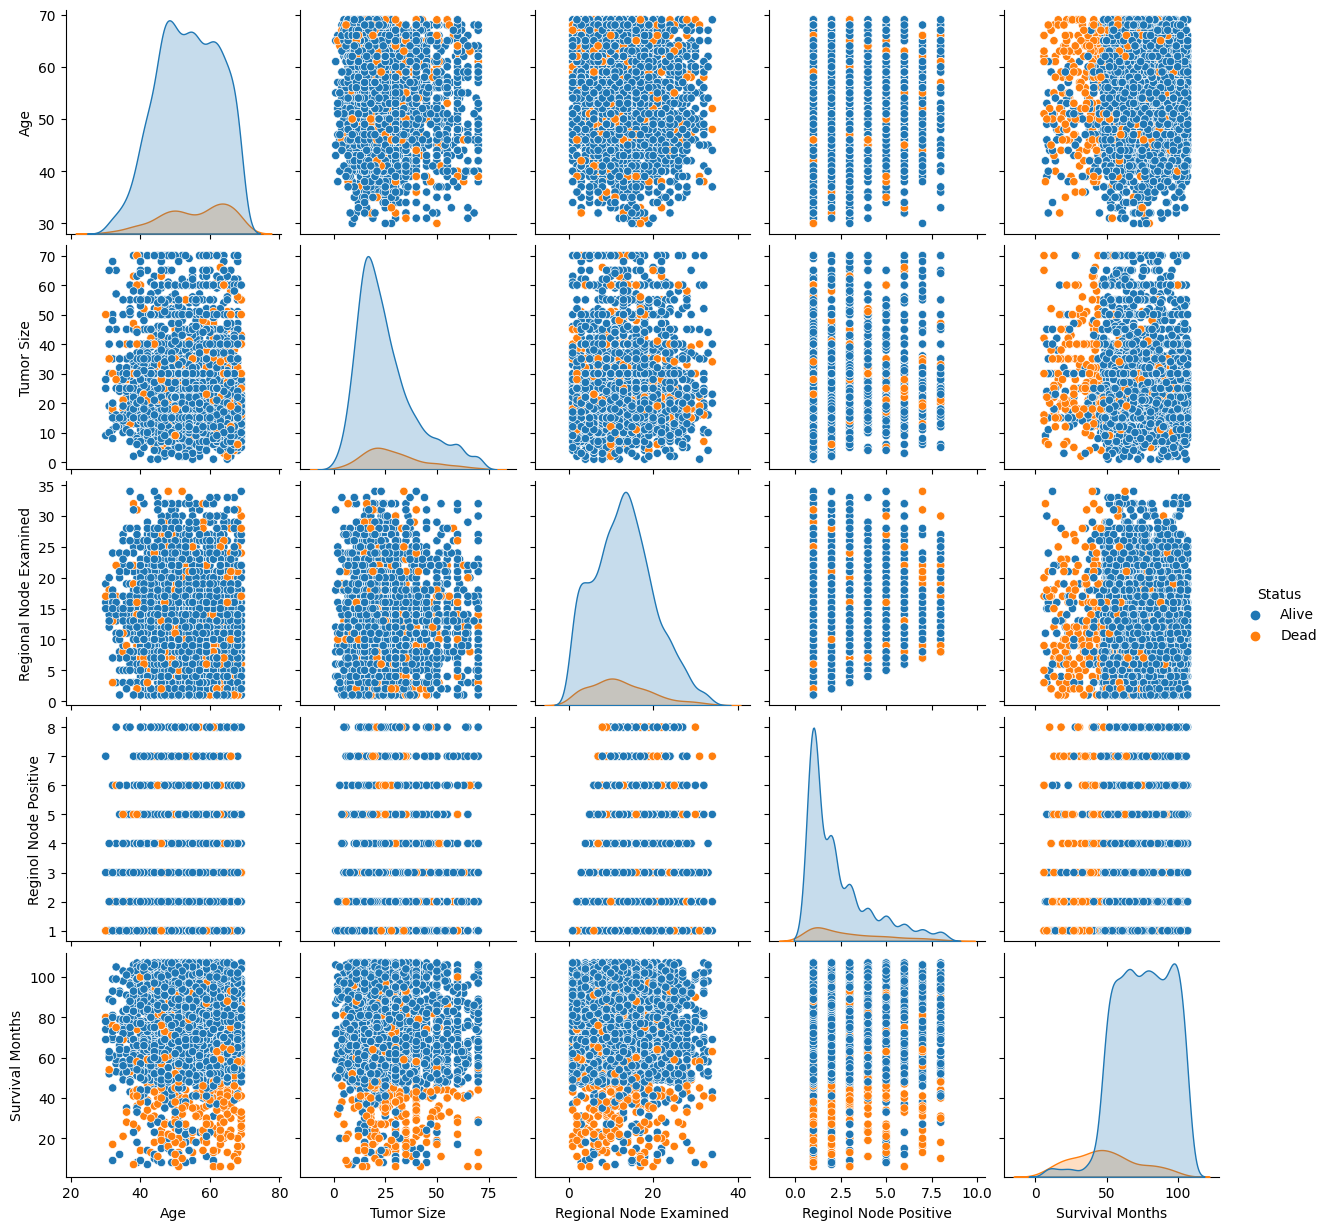

In [19]:
sb.pairplot(df,hue="Status")

In [20]:
age_bins = ['30', '40', '50', '60', '70']
age_labels = [1, 2, 3, 4]
df['Age'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [21]:
for col in df.columns:
    res = df[col].dtypes
    if(res == "object"):
        df[col] = pd.factorize(df[col])[0] + 1

In [22]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,4,1,1,1,1,1,1,1,1,4,1,1,24,1,60,1
1,2,1,1,2,2,2,2,2,1,35,1,1,14,5,62,1
2,3,1,2,3,3,3,2,2,1,63,1,1,14,7,75,1
3,3,1,1,1,1,1,1,1,1,18,1,1,2,1,84,1
4,2,1,1,2,1,4,1,1,1,41,1,1,3,1,50,1


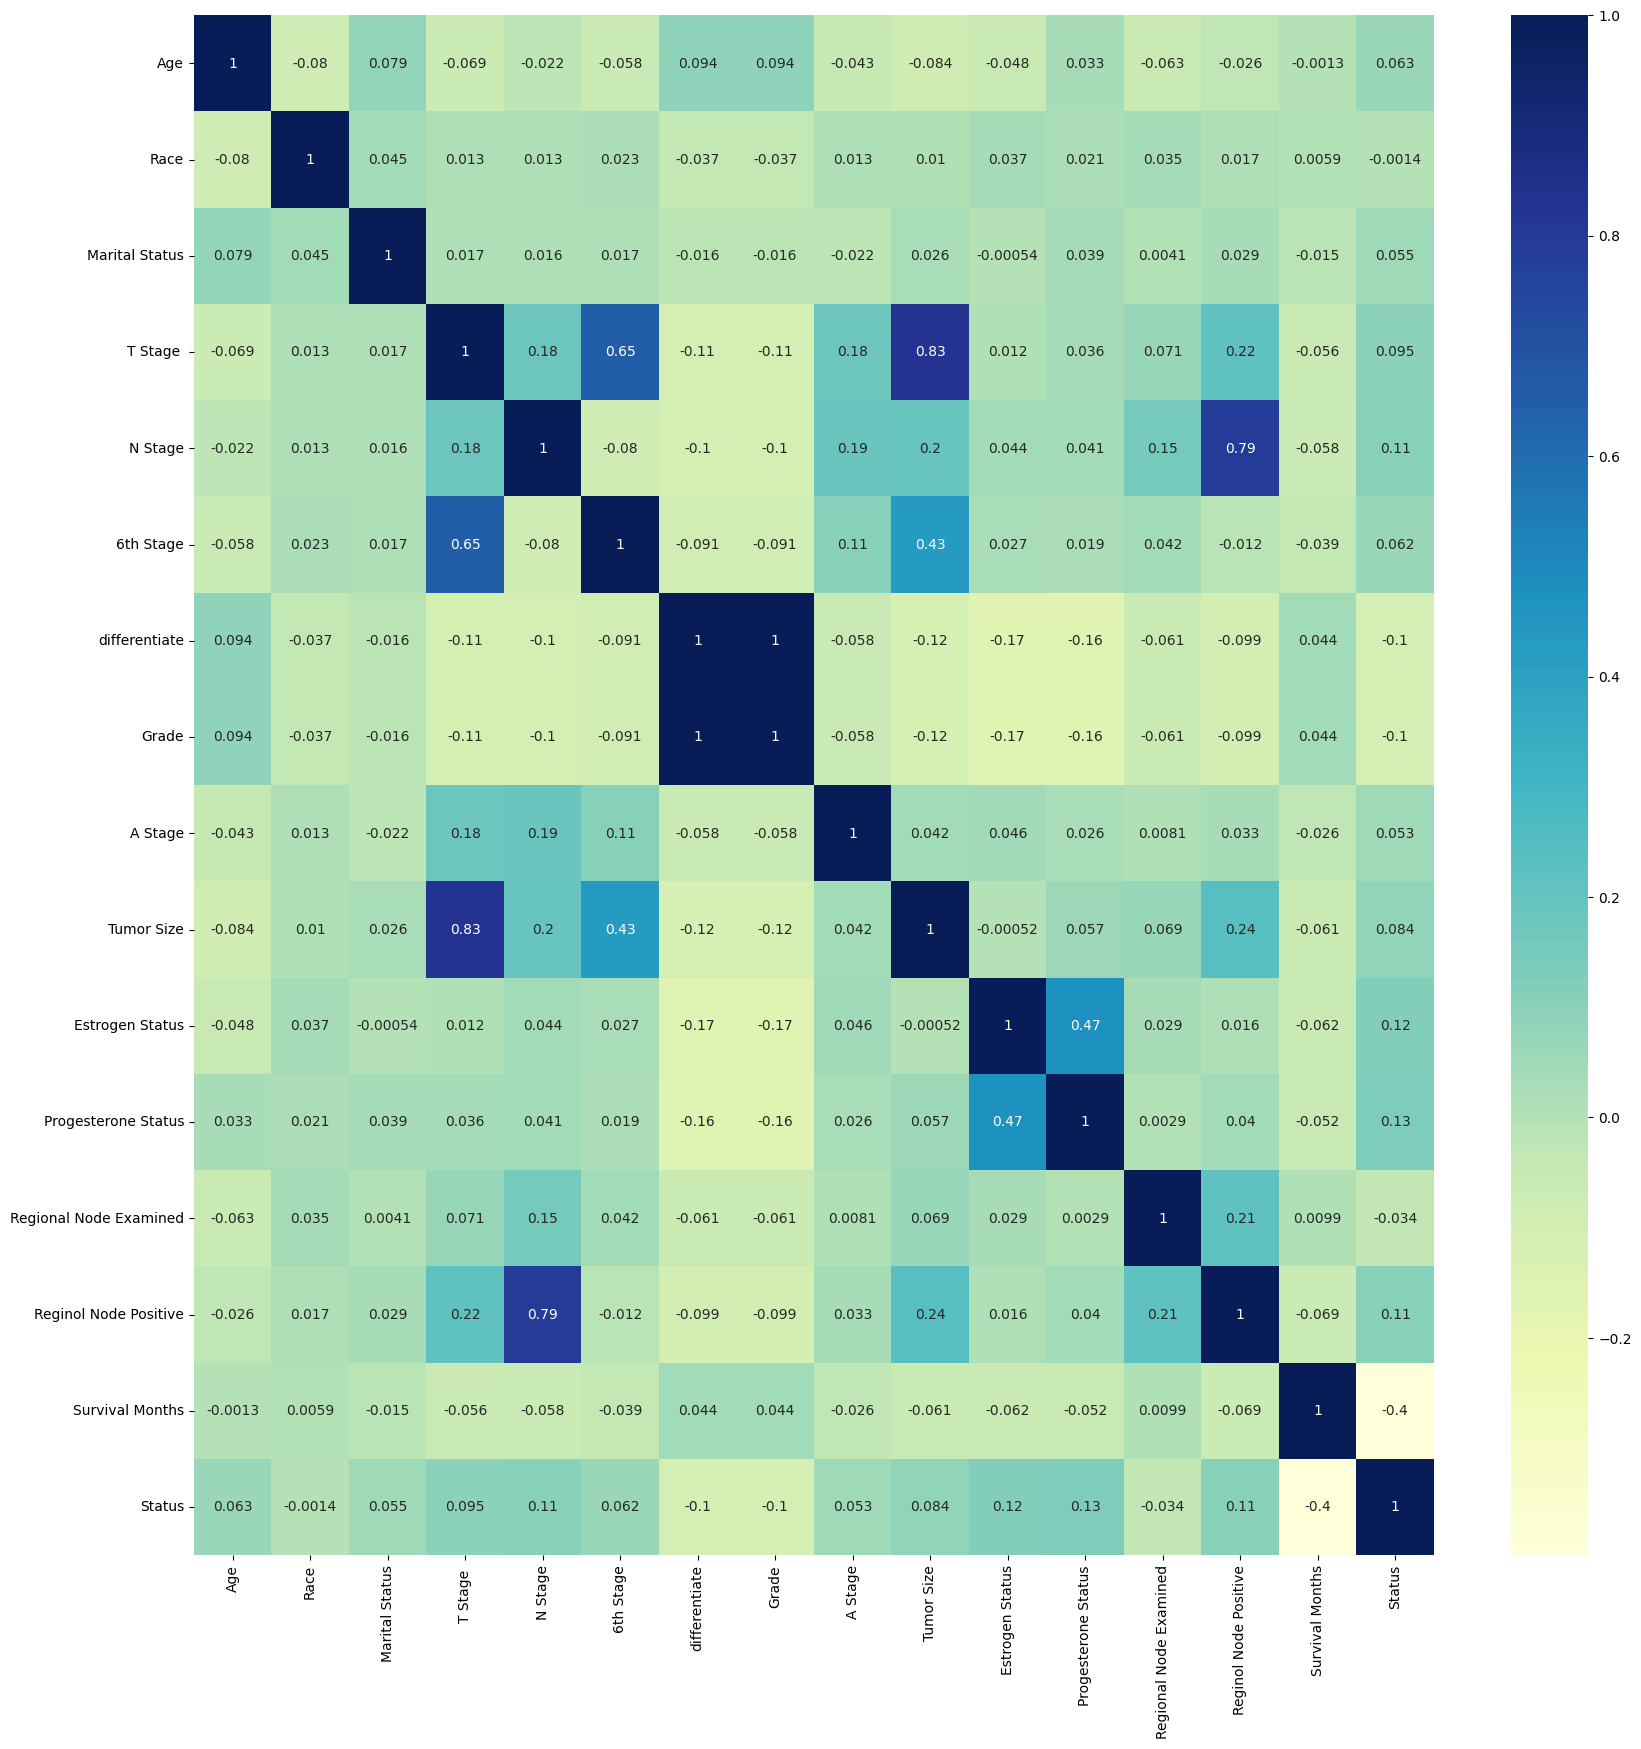

In [23]:
fig, ax = plt.subplots(figsize=(20,20))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [24]:
df.corr(method='pearson', min_periods=1)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
Age,1.000000,-0.080325,0.078575,-0.069243,-0.022003,-0.057519,0.093907,0.093907,-0.042638,-0.083819,-0.047944,0.033439,-0.063279,-0.026274,-0.001296,0.063332
Race,-0.080325,1.000000,0.044907,0.012938,0.013081,0.022699,-0.037173,-0.037173,0.012529,0.010093,0.037371,0.021153,0.035094,0.016778,0.005916,-0.001372
Marital Status,0.078575,0.044907,1.000000,0.016635,0.016076,0.016548,-0.015666,-0.015666,-0.022150,0.025747,-0.000543,0.039481,0.004061,0.029089,-0.014504,0.055354
T Stage,-0.069243,0.012938,0.016635,1.000000,0.177793,0.646122,-0.109110,-0.109110,0.180679,0.827406,0.011965,0.036488,0.071158,0.216780,-0.056225,0.095094
N Stage,-0.022003,0.013081,0.016076,0.177793,1.000000,-0.080167,-0.104800,-0.104800,0.187449,0.195043,0.044300,0.041418,0.152479,0.791400,-0.058108,0.109515
6th Stage,-0.057519,0.022699,0.016548,0.646122,-0.080167,1.000000,-0.090888,-0.090888,0.109563,0.427860,0.027173,0.018590,0.041830,-0.012325,-0.039273,0.062132
differentiate,0.093907,-0.037173,-0.015666,-0.109110,-0.104800,-0.090888,1.000000,1.000000,-0.057639,-0.116747,-0.165713,-0.159368,-0.061455,-0.098628,0.044286,-0.103977
Grade,0.093907,-0.037173,-0.015666,-0.109110,-0.104800,-0.090888,1.000000,1.000000,-0.057639,-0.116747,-0.165713,-0.159368,-0.061455,-0.098628,0.044286,-0.103977
A Stage,-0.042638,0.012529,-0.022150,0.180679,0.187449,0.109563,-0.057639,-0.057639,1.000000,0.042302,0.046193,0.026005,0.008053,0.033133,-0.026254,0.053388
Tumor Size,-0.083819,0.010093,0.025747,0.827406,0.195043,0.427860,-0.116747,-0.116747,0.042302,1.000000,-0.000521,0.057278,0.068602,0.241410,-0.060801,0.083966


In [25]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,4,1,1,1,1,1,1,1,1,4,1,1,24,1,60,1
1,2,1,1,2,2,2,2,2,1,35,1,1,14,5,62,1
2,3,1,2,3,3,3,2,2,1,63,1,1,14,7,75,1
3,3,1,1,1,1,1,1,1,1,18,1,1,2,1,84,1
4,2,1,1,2,1,4,1,1,1,41,1,1,3,1,50,1


<h1>Machine Learning Models<h1>

In [26]:
#pip install -U imbalanced-learn

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler

In [29]:
#Preparing Data for Machine learning
y = df['Status']
x = df[['Grade','Tumor Size','Estrogen Status','Reginol Node Positive','Survival Months']]
#OverSampling The Data
over_sampler = RandomOverSampler(random_state=42)
x_res, y_res = over_sampler.fit_resample(x, y)

#splitting Data into testing and training
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.25, random_state=0)

<h1>Logistic Regression<h1>

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
Model = LogisticRegression()
Model.fit(x_train, y_train)

LogisticRegression()

In [32]:
y_prediction = Model.predict(x_test)

In [33]:
print("accuracy ",accuracy_score(y_test,y_prediction))
print("precision ",precision_score(y_test,y_prediction))
print("recall ",recall_score(y_test,y_prediction))
print("f1 ",f1_score(y_test,y_prediction))

accuracy  0.7370600414078675
precision  0.7361111111111112
recall  0.7350901525658807
f1  0.7356002775850103


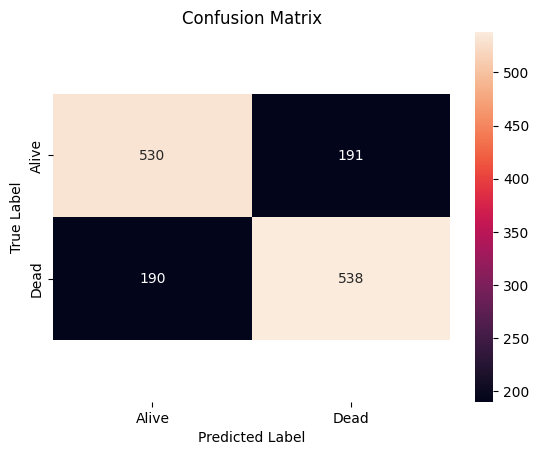

In [34]:
cm = confusion_matrix(y_test, y_prediction)
class_label = ["Alive", "Dead"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sb.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<h1>Random Forest<h1>

In [35]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pickle

In [36]:
rf = RandomForestClassifier(n_estimators=150, max_depth=12, n_jobs=-1)

In [37]:
rf_model = rf.fit(x_train, y_train)

In [38]:
y_pred =rf_model.predict(x_test)

In [39]:
print("accuracy ",accuracy_score(y_test,y_pred))
print("precision ",precision_score(y_test,y_pred))
print("recall ",recall_score(y_test,y_pred))
print("f1 ",f1_score(y_test,y_pred))

accuracy  0.9233954451345756
precision  0.9552238805970149
recall  0.8876560332871013
f1  0.9202012940330697


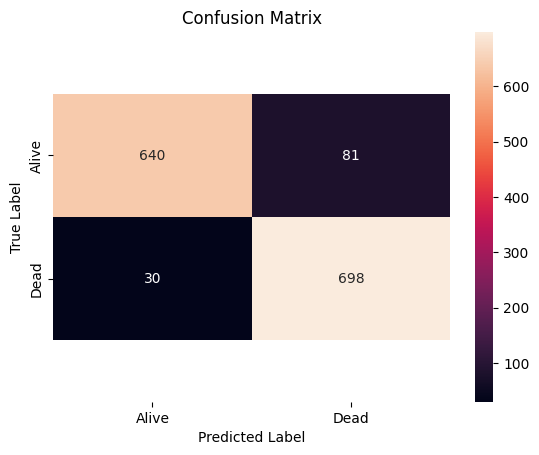

In [40]:
cm = confusion_matrix(y_test,y_pred)
class_label = ["Alive", "Dead"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sb.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [41]:
#make pickle file of our model
pickle.dump(rf,open("RFmodel.pkl","wb"))

<h1> SVM <h1>

In [42]:
from sklearn import svm

In [43]:
model = svm.SVC()
model.fit(x_train, y_train)
svm_pred = model.predict(x_test)

In [44]:
print("accuracy ",accuracy_score(y_test, svm_pred))
print("precision ",precision_score(y_test, svm_pred))
print("recall ",recall_score(y_test, svm_pred))
print("f1 ",f1_score(y_test, svm_pred))

accuracy  0.7412008281573499
precision  0.7125307125307125
recall  0.8044382801664355
f1  0.7557003257328991


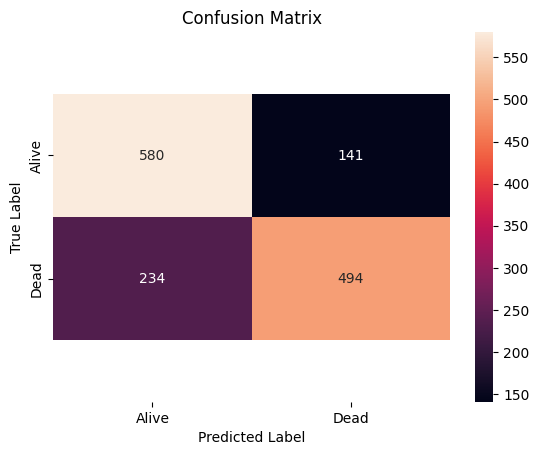

In [45]:
cm = confusion_matrix(y_test, svm_pred)
class_label = ["Alive", "Dead"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sb.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**bold text**<h1> KNN <h1>

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
k = 5  # Number of nearest neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

In [48]:
print("accuracy ",accuracy_score(y_test,knn_pred))
print("precision ",precision_score(y_test,knn_pred))
print("recall ",recall_score(y_test, knn_pred))
print("f1 ",f1_score(y_test,knn_pred))

accuracy  0.8681849551414769
precision  0.9681978798586572
recall  0.7600554785020804
f1  0.8515928515928517


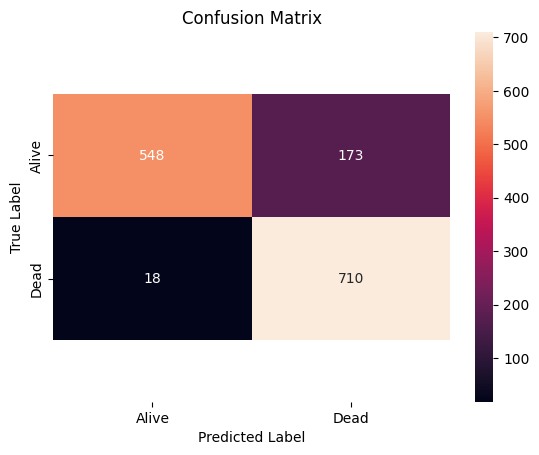

In [49]:
cm = confusion_matrix(y_test,knn_pred)
class_label = ["Alive", "Dead"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sb.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [50]:
 #Naive Bayes 

In [51]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
 
# making predictions on the testing set
gnb_pred = gnb.predict(x_test)

In [52]:
print("accuracy ",accuracy_score(y_test,gnb_pred))
print("precision ",precision_score(y_test,gnb_pred))
print("recall ",recall_score(y_test, gnb_pred))
print("f1 ",f1_score(y_test,gnb_pred))

accuracy  0.7273982056590752
precision  0.693127962085308
recall  0.811373092926491
f1  0.7476038338658146


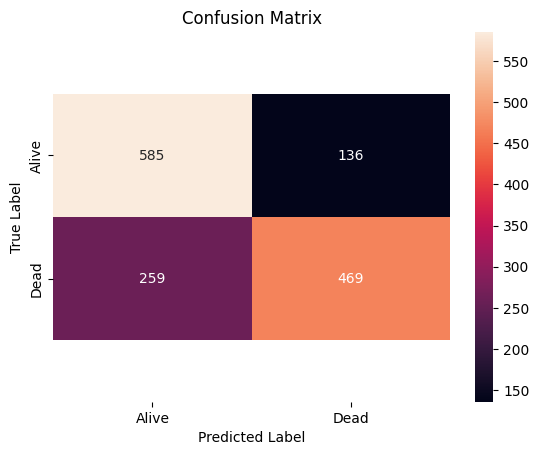

In [53]:
cm = confusion_matrix(y_test,gnb_pred)
class_label = ["Alive", "Dead"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sb.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()